In [2]:
# import packages and df
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/dalto/OneDrive/Pictures/Documents/Projects/MLB/pitch_value')

statcast = pd.read_csv('./data/datasets/full2024_statcast_woba.csv')


Hit woba is somewhat useless here but the swinging strike right is note worthy. Seperated the data by velo group and pitch type. This isnt super stable right now but with full season data this likely normalizes

In [3]:
# remove nas in effective speed from df
statcast = statcast.dropna(subset=['pitch_velo_adj'])

statcast['velo_group'] = pd.cut(statcast['pitch_velo_adj'], bins=np.arange(int(statcast['pitch_velo_adj'].min()), 
    int(statcast['pitch_velo_adj'].max()) + 1, 0.5), right=False)

pitch_counts = statcast.groupby(['pitch_name', 'velo_group']).size().reset_index(name='pitch_count')

swinging_strike_rates = statcast.groupby(['pitch_name', 'velo_group'])['swinging_strike'].mean().reset_index()

swinging_strike_rates = pd.merge(swinging_strike_rates, pitch_counts, on=['pitch_name', 'velo_group'])
swinging_strike_rates = swinging_strike_rates[swinging_strike_rates['pitch_count'] >= 20]

# calculate the percentile for swingstrike rate
swinging_strike_rates['swinging_strike_percentile'] = swinging_strike_rates['swinging_strike'].rank(pct=True) * 100

# Calculate percentile for each velo group within each pitch type
swinging_strike_rates['velo_percentile'] = (swinging_strike_rates.groupby('pitch_name')['velo_group'].
    transform(lambda x: pd.Series(x.cat.codes).rank(pct=True) * 100))

print(swinging_strike_rates)

           pitch_name    velo_group  swinging_strike  pitch_count  \
111   4-Seam Fastball  [83.5, 84.0)         0.117647           34   
112   4-Seam Fastball  [84.0, 84.5)         0.042553           47   
113   4-Seam Fastball  [84.5, 85.0)         0.050000           60   
114   4-Seam Fastball  [85.0, 85.5)         0.031579           95   
115   4-Seam Fastball  [85.5, 86.0)         0.038462          156   
...               ...           ...              ...          ...   
2506          Sweeper  [88.5, 89.0)         0.162338          154   
2507          Sweeper  [89.0, 89.5)         0.164948           97   
2508          Sweeper  [89.5, 90.0)         0.191176           68   
2509          Sweeper  [90.0, 90.5)         0.263158           38   
2510          Sweeper  [90.5, 91.0)         0.125000           32   

      swinging_strike_percentile  velo_percentile  
111                    50.791855         2.380952  
112                     4.072398         4.761905  
113            

C:\Users\dalto\AppData\Local\Temp\ipykernel_15776\3157441212.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pitch_counts = statcast.groupby(['pitch_name', 'velo_group']).size().reset_index(name='pitch_count')
C:\Users\dalto\AppData\Local\Temp\ipykernel_15776\3157441212.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  swinging_strike_rates = statcast.groupby(['pitch_name', 'velo_group'])['swinging_strike'].mean().reset_index()


correlation between the two percentiles

In [4]:
correlation = swinging_strike_rates['swinging_strike_percentile'].corr(swinging_strike_rates['velo_percentile'])
print(f"The correlation between swinging strike percentile and velo percentile is: {correlation:.2f}")

The correlation between swinging strike percentile and velo percentile is: 0.30


graphing of the realationships for each pitch type

The correlation between swinging strike rate and velo percentile for 4-Seam Fastball is: 0.84


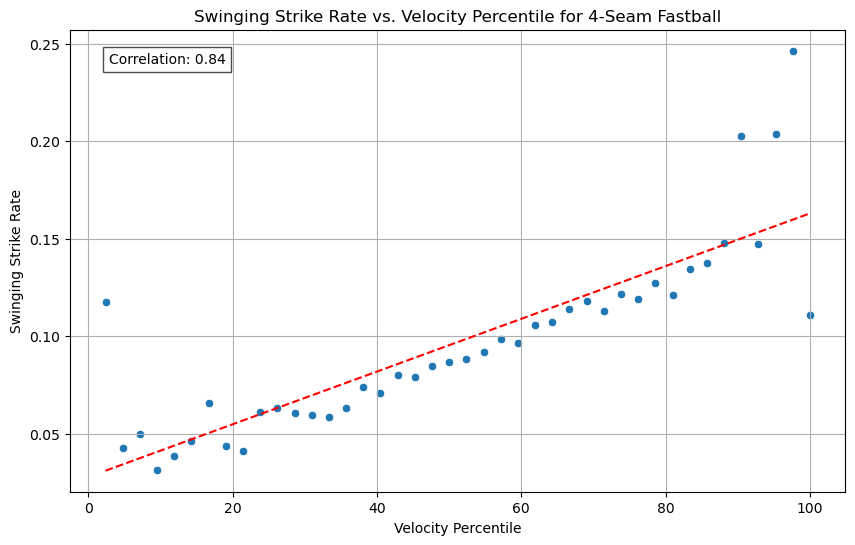

The correlation between swinging strike rate and velo percentile for Changeup is: -0.34


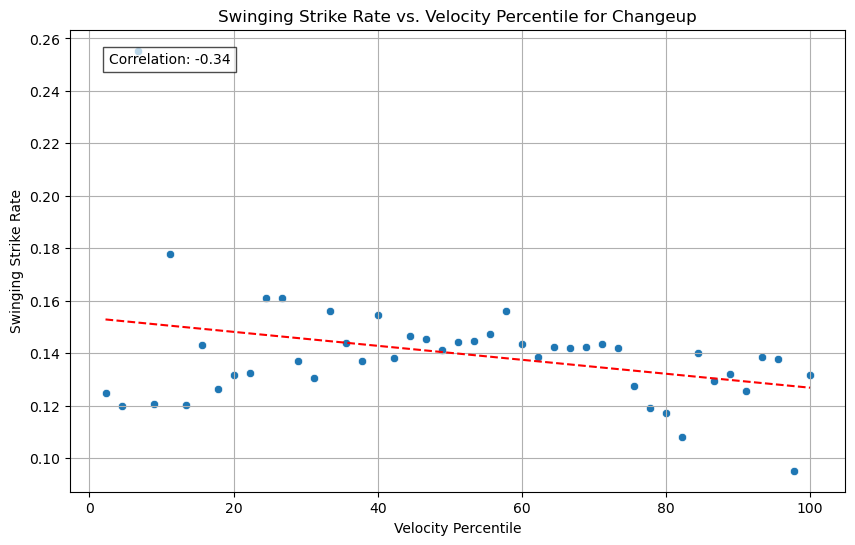

The correlation between swinging strike rate and velo percentile for Curveball is: 0.13


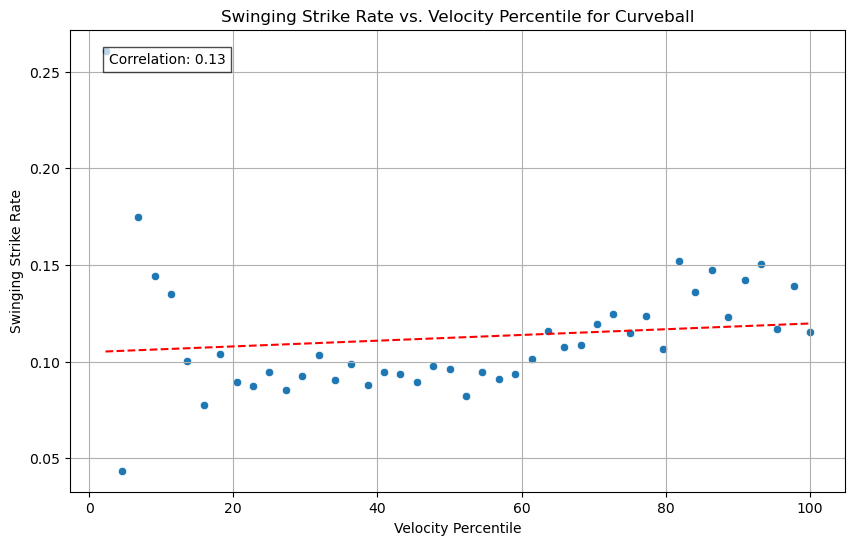

The correlation between swinging strike rate and velo percentile for Cutter is: -0.02


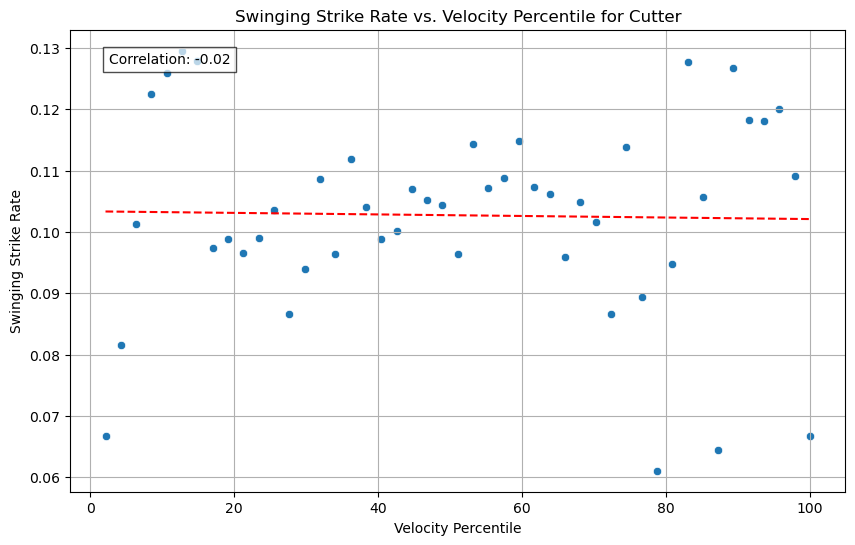

The correlation between swinging strike rate and velo percentile for Eephus is: nan


c:\Users\dalto\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\dalto\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\dalto\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\dalto\AppData\Local\Temp\ipykernel_15776\2265658156.py:15: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(pitch_df['velo_percentile'], pitch_df['swinging_strike'], 1)


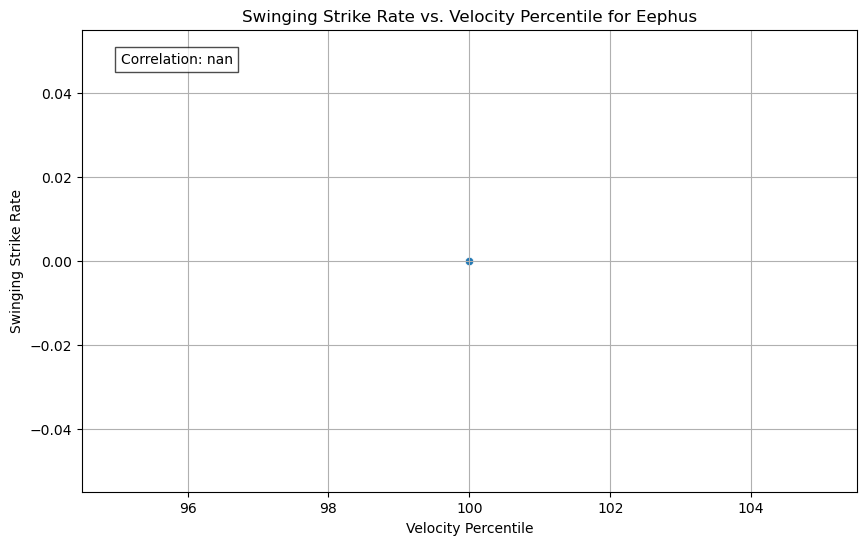

The correlation between swinging strike rate and velo percentile for Forkball is: nan


c:\Users\dalto\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\dalto\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\dalto\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\dalto\AppData\Local\Temp\ipykernel_15776\2265658156.py:15: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(pitch_df['velo_percentile'], pitch_df['swinging_strike'], 1)


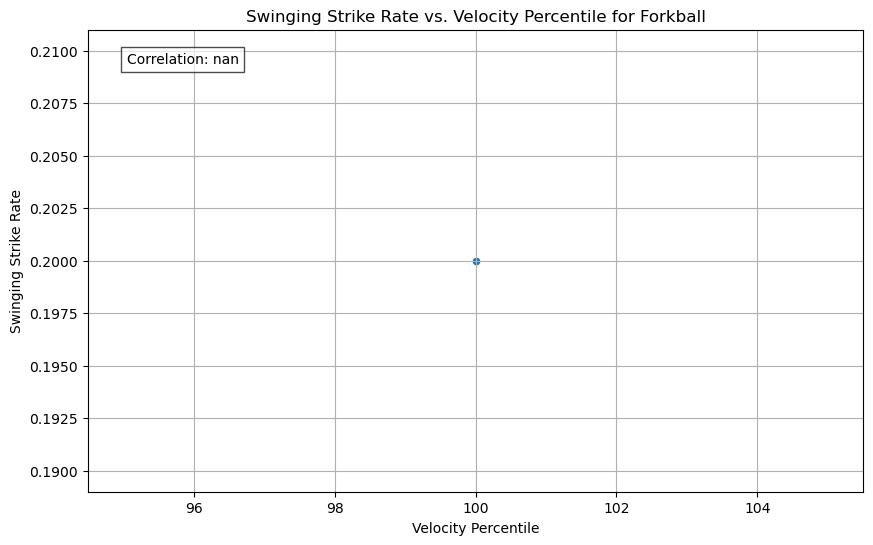

The correlation between swinging strike rate and velo percentile for Knuckle Curve is: 0.72


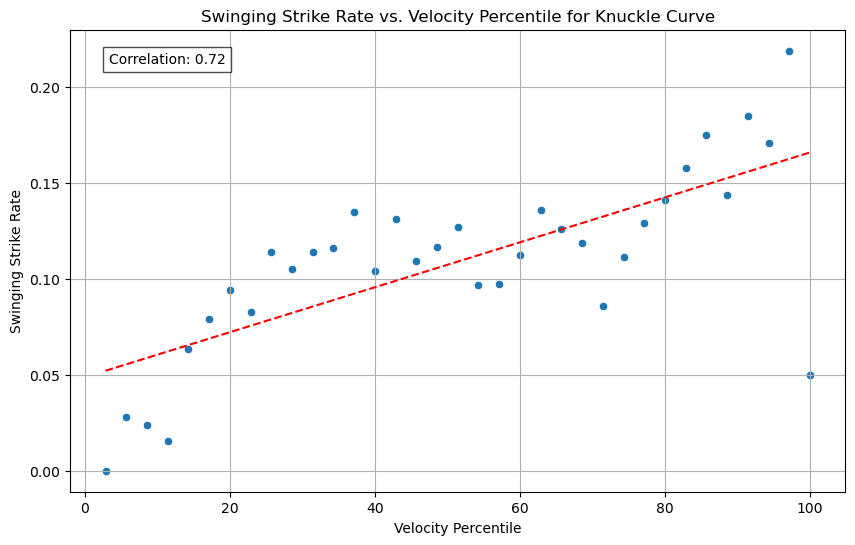

The correlation between swinging strike rate and velo percentile for Knuckleball is: 0.37


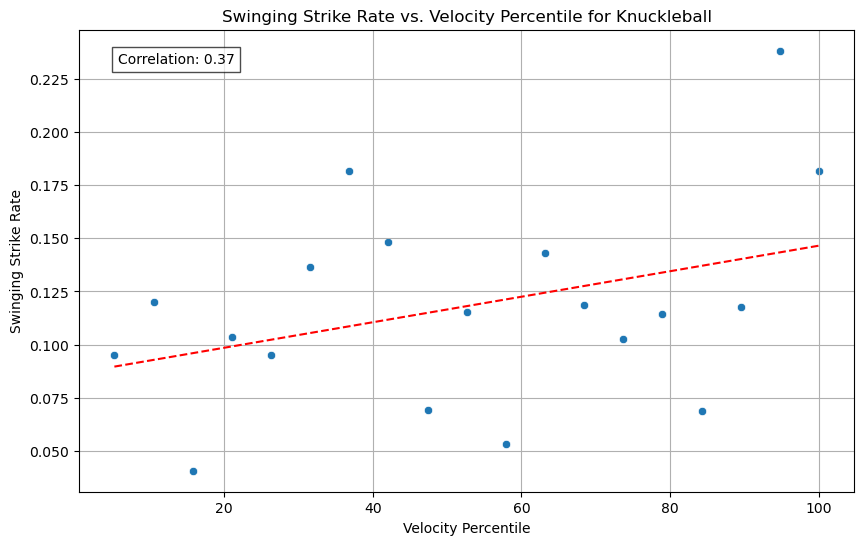

The correlation between swinging strike rate and velo percentile for Other is: nan


c:\Users\dalto\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\dalto\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\dalto\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\dalto\AppData\Local\Temp\ipykernel_15776\2265658156.py:15: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(pitch_df['velo_percentile'], pitch_df['swinging_strike'], 1)


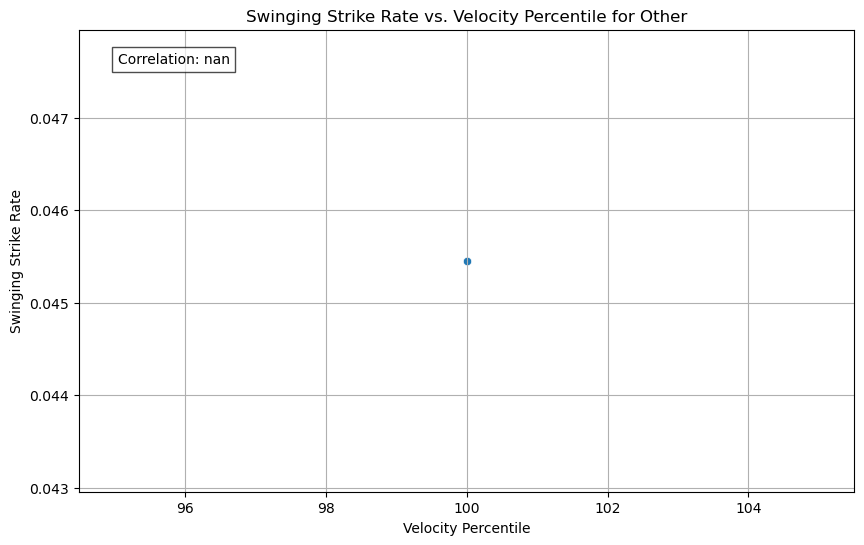

The correlation between swinging strike rate and velo percentile for Screwball is: 0.87


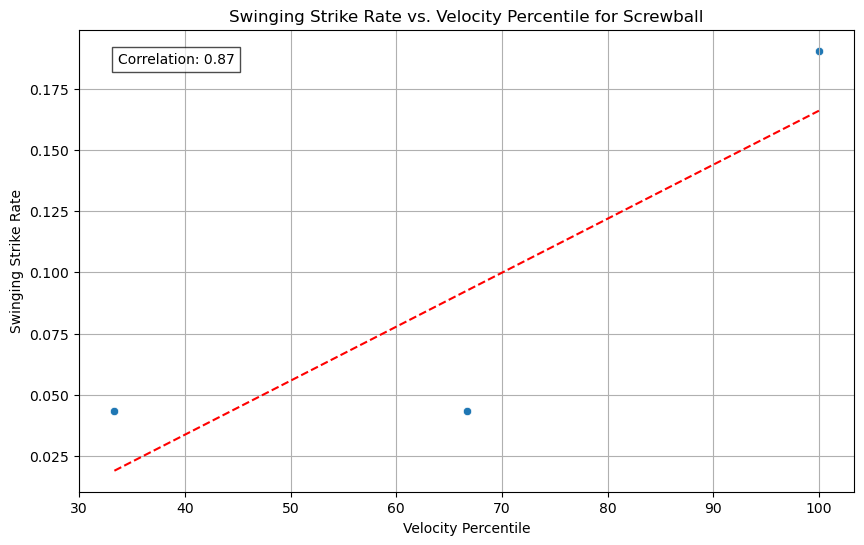

The correlation between swinging strike rate and velo percentile for Sinker is: 0.54


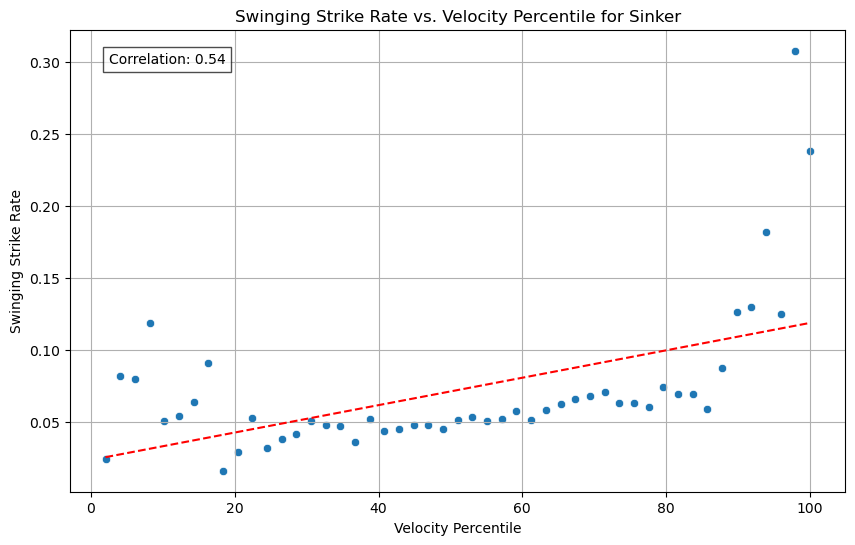

The correlation between swinging strike rate and velo percentile for Slider is: 0.75


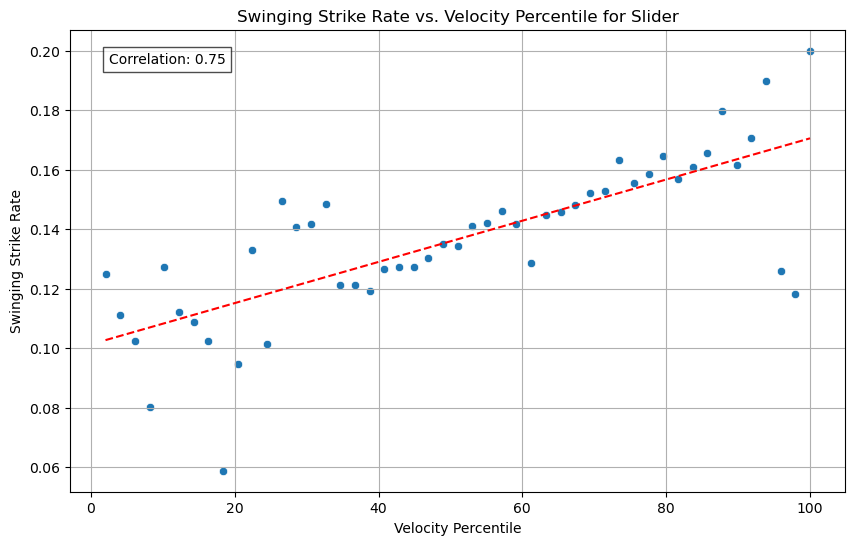

The correlation between swinging strike rate and velo percentile for Slurve is: 0.29


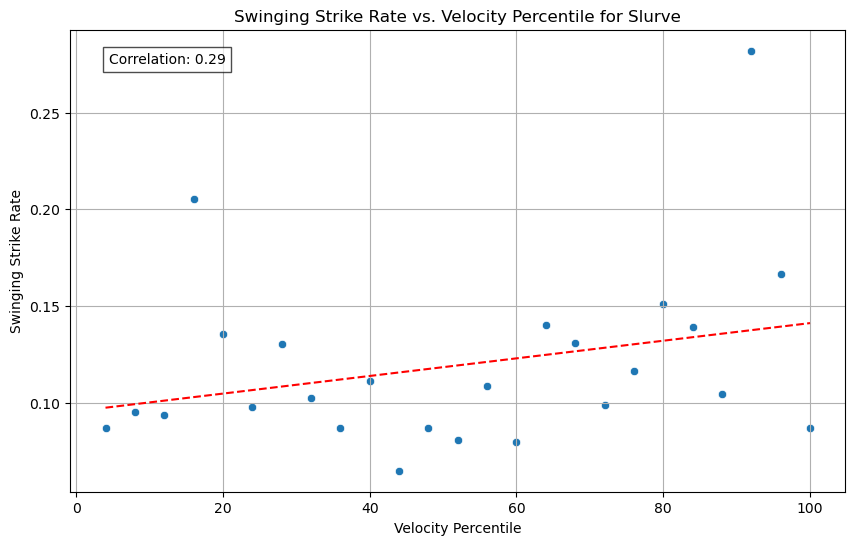

The correlation between swinging strike rate and velo percentile for Split-Finger is: -0.09


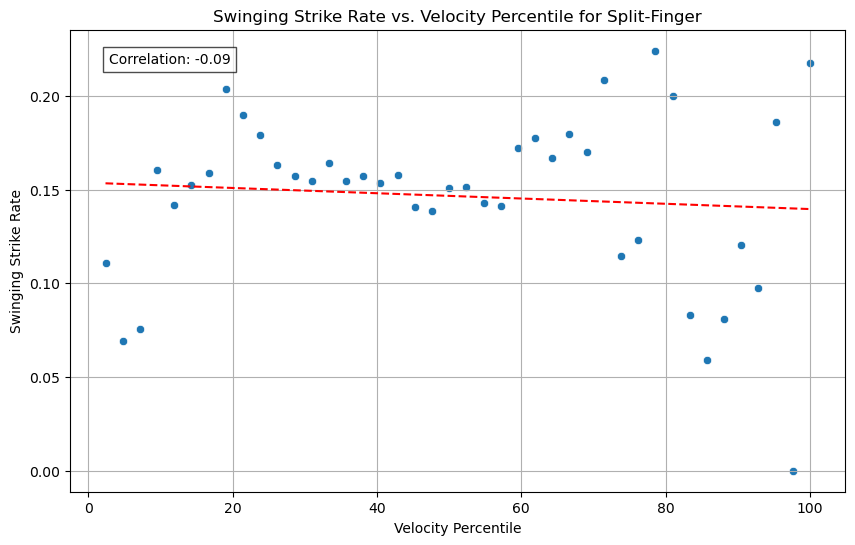

The correlation between swinging strike rate and velo percentile for Sweeper is: 0.60


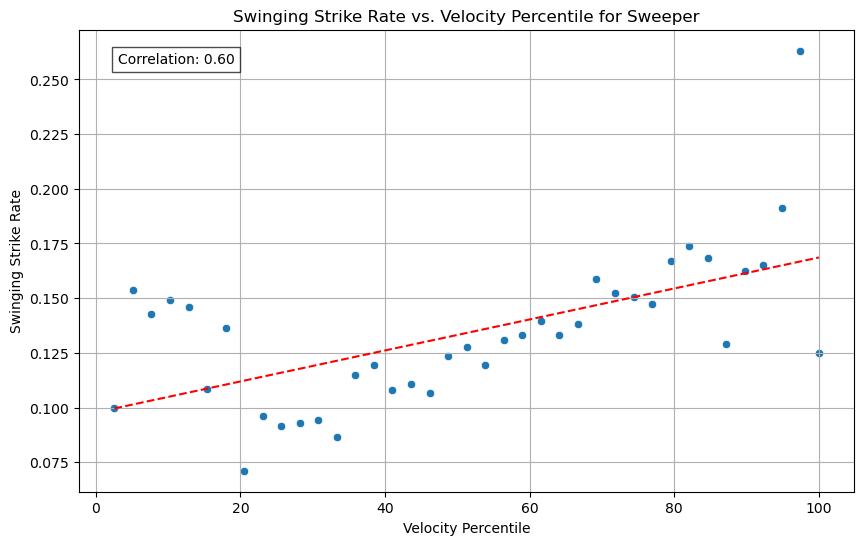

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

for pitch in swinging_strike_rates['pitch_name'].unique():
    pitch_df = swinging_strike_rates[swinging_strike_rates['pitch_name'] == pitch]
    correlation = pitch_df['swinging_strike'].corr(pitch_df['velo_percentile'])
    print(f"The correlation between swinging strike rate and velo percentile for {pitch} is: {correlation:.2f}")

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=pitch_df, x='velo_percentile', y='swinging_strike')

    # Add trendline
    z = np.polyfit(pitch_df['velo_percentile'], pitch_df['swinging_strike'], 1)
    p = np.poly1d(z)
    plt.plot(pitch_df['velo_percentile'], p(pitch_df['velo_percentile']), "r--")

    # Label the trendline strength (correlation)
    plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    plt.title(f'Swinging Strike Rate vs. Velocity Percentile for {pitch}')
    plt.xlabel('Velocity Percentile')
    plt.ylabel('Swinging Strike Rate')
    plt.grid(True)
    plt.show()